In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v1_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v1_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Electron
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Electron

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [5]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['dEscaleDown', 'dEscaleUp', 'dEsigmaDown', 'dEsigmaUp', 'deltaEtaSC', 'dr03EcalRecHitSumEt', 'dr03HcalDepth1TowerSumEt', 'dr03TkSumPt', 'dr03TkSumPtHEEP', 'dxy', 'dxyErr', 'dz', 'dzErr', 'eCorr', 'eInvMinusPInv', 'energyErr', 'eta', 'hoe', 'ip3d', 'jetPtRelv2', 'jetRelIso', 'mass', 'miniPFRelIso_all', 'miniPFRelIso_chg', 'mvaFall17V2Iso', 'mvaFall17V2noIso', 'pfRelIso03_all', 'pfRelIso03_chg', 'phi', 'pt', 'r9', 'scEtOverPt', 'sieie', 'sip3d', 'mvaTTH', 'charge', 'cutBased', 'jetIdx', 'pdgId', 'photonIdx', 'tightCharge', 'vidNestedWPBitmap', 'vidNestedWPBitmapHEEP', 'convVeto', 'cutBased_HEEP', 'isPFcand', 'jetNDauCharged', 'lostHits', 'mvaFall17V2Iso_WP80', 'mvaFall17V2Iso_WP90', 'mvaFall17V2Iso_WPL', 'mvaFall17V2noIso_WP80', 'mvaFall17V2noIso_WP90', 'mvaFall17V2noIso_WPL', 'seedGain', 'genPartIdx', 'genPartFlav', 'cleanmask', 'genPartIdxG', 'jetIdxG', 'photonIdxG']


# Boolean type variables
## Apply to variables and check the distribution

## isPFcand

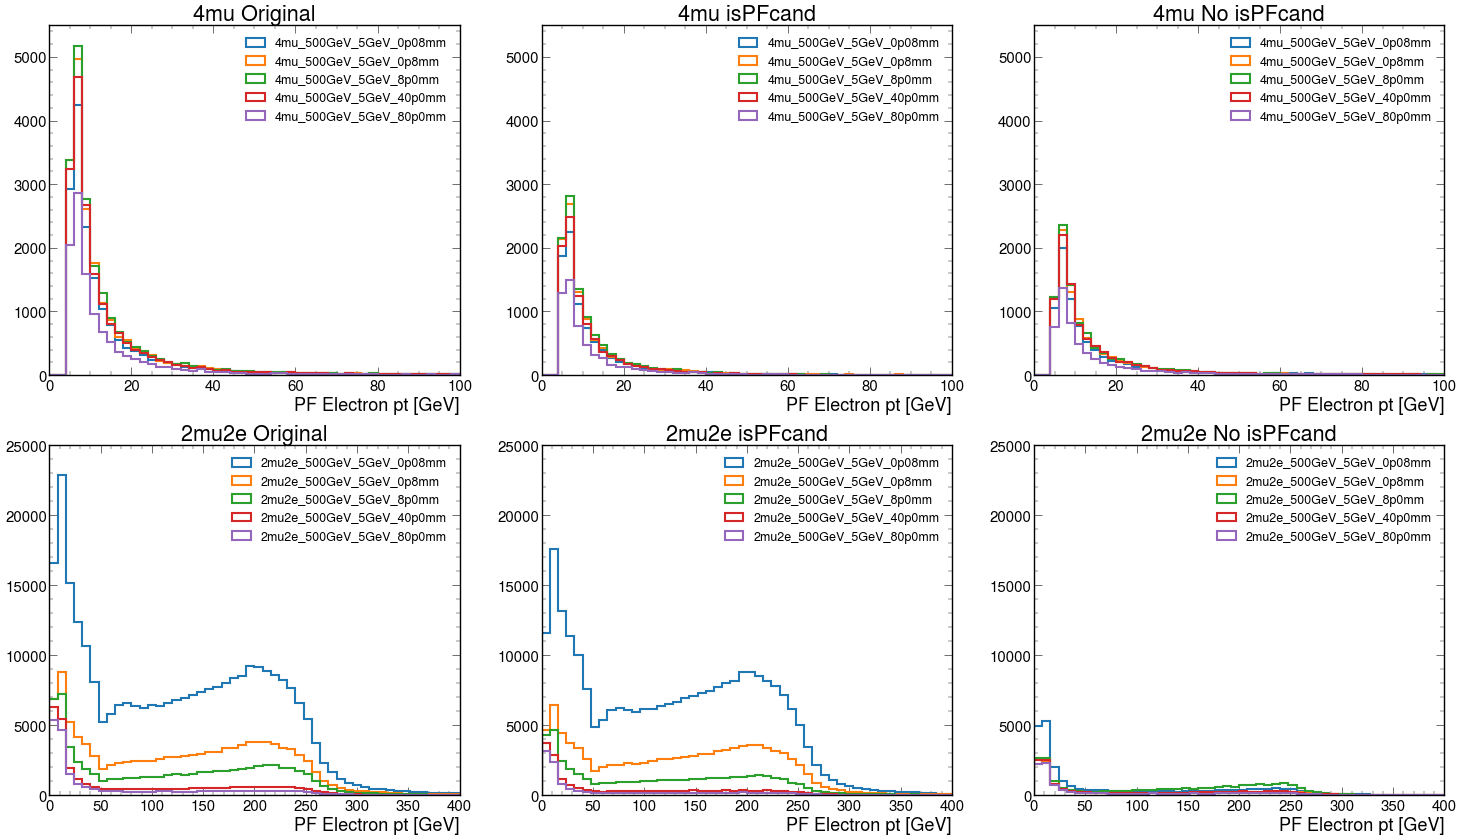

In [7]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].pt
    evt2 = events_2mu2e[i_2mu].pt    
    mask1 = (events_4mu[i_4mu].isPFcand == False)
    mask2 = (events_2mu2e[i_2mu].isPFcand == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].isPFcand]), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].isPFcand]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(0,100)
ax[0][1].set_xlim(0,100)
ax[0][2].set_xlim(0,100)
ax[1][0].set_xlim(0,400)
ax[1][1].set_xlim(0,400)
ax[1][2].set_xlim(0,400)

ax[0][0].set_ylim(0,5500)
ax[0][1].set_ylim(0,5500)
ax[0][2].set_ylim(0,5500)
ax[1][0].set_ylim(0,25000)
ax[1][1].set_ylim(0,25000)
ax[1][2].set_ylim(0,25000)

ax[0][0].set_xlabel('PF Electron pt [GeV]')
ax[0][1].set_xlabel('PF Electron pt [GeV]')
ax[0][2].set_xlabel('PF Electron pt [GeV]')
ax[1][0].set_xlabel('PF Electron pt [GeV]')
ax[1][1].set_xlabel('PF Electron pt [GeV]')
ax[1][2].set_xlabel('PF Electron pt [GeV]')

ax[0][0].legend(fontsize=18)
ax[0][1].legend(fontsize=18)
ax[0][2].legend(fontsize=18)
ax[1][0].legend(fontsize=18)
ax[1][1].legend(fontsize=18)
ax[1][2].legend(fontsize=18)


ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu isPFcand')
ax[0][2].set_title('4mu No isPFcand')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e isPFcand')
ax[1][2].set_title('2mu2e No isPFcand')

plt.savefig("../Plots/PF_ELECTRON/Boolean/isPFcand_pt.png", bbox_inches="tight")

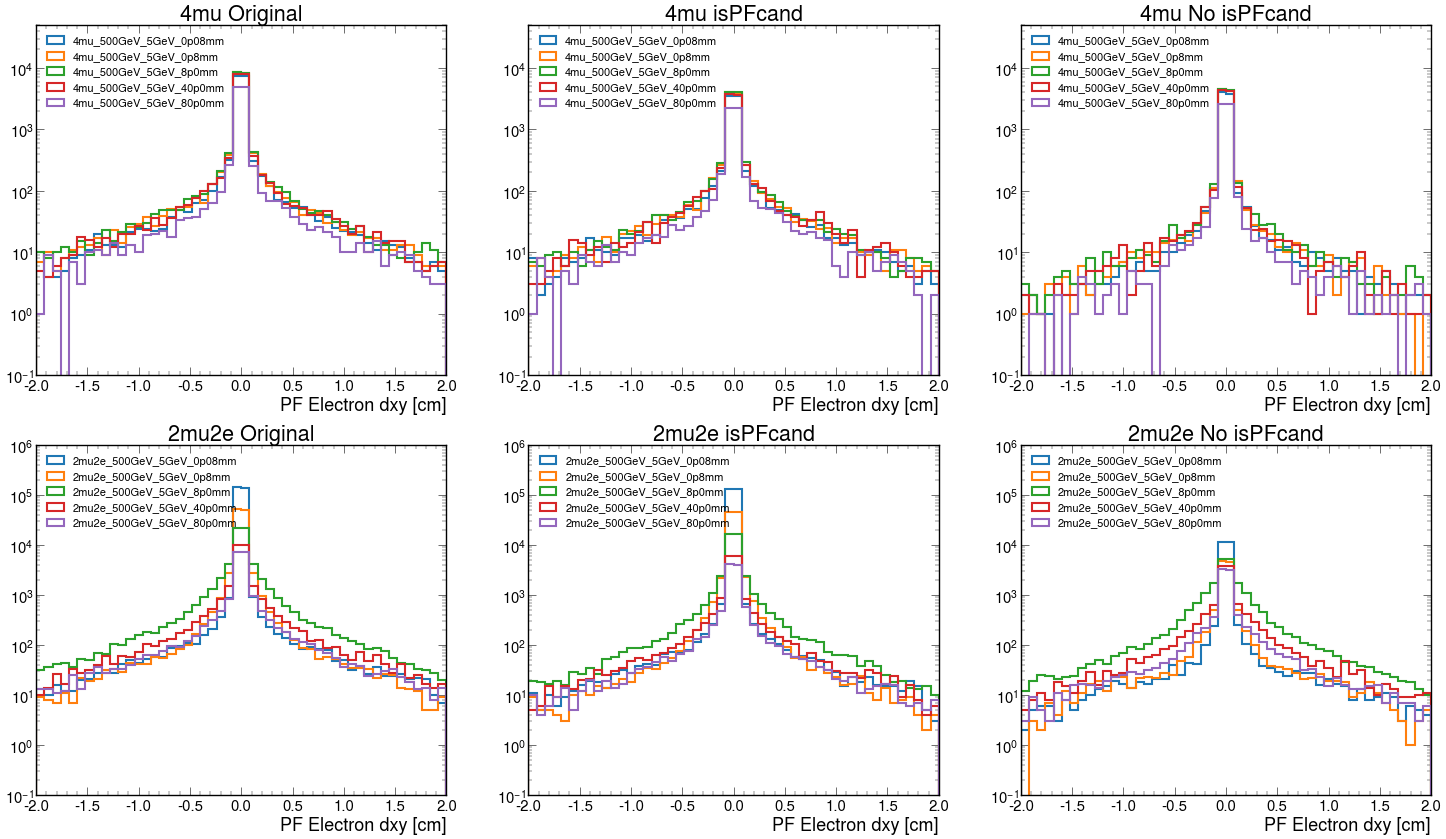

In [12]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].dxy
    evt2 = events_2mu2e[i_2mu].dxy    
    mask1 = (events_4mu[i_4mu].isPFcand == False)
    mask2 = (events_2mu2e[i_2mu].isPFcand == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].isPFcand]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].isPFcand]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(-2,2)
ax[0][1].set_xlim(-2,2)
ax[0][2].set_xlim(-2,2)
ax[1][0].set_xlim(-2,2)
ax[1][1].set_xlim(-2,2)
ax[1][2].set_xlim(-2,2)


ax[0][0].set_ylim(0.1,50000)
ax[0][1].set_ylim(0.1,50000)
ax[0][2].set_ylim(0.1,50000)
ax[1][0].set_ylim(0.1,1000000)
ax[1][1].set_ylim(0.1,1000000)
ax[1][2].set_ylim(0.1,1000000)


ax[0][0].set_xlabel('PF Electron dxy [cm]')
ax[0][1].set_xlabel('PF Electron dxy [cm]')
ax[0][2].set_xlabel('PF Electron dxy [cm]')
ax[1][0].set_xlabel('PF Electron dxy [cm]')
ax[1][1].set_xlabel('PF Electron dxy [cm]')
ax[1][2].set_xlabel('PF Electron dxy [cm]')

ax[0][0].legend(fontsize=16, loc='upper left')
ax[0][1].legend(fontsize=16, loc='upper left')
ax[0][2].legend(fontsize=16, loc='upper left')
ax[1][0].legend(fontsize=16, loc='upper left')
ax[1][1].legend(fontsize=16, loc='upper left')
ax[1][2].legend(fontsize=16, loc='upper left')

ax[0][0].set_yscale("log")
ax[0][1].set_yscale("log")
ax[0][2].set_yscale("log")
ax[1][0].set_yscale("log")
ax[1][1].set_yscale("log")
ax[1][2].set_yscale("log")

ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu isPFcand')
ax[0][2].set_title('4mu No isPFcand')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e isPFcand')
ax[1][2].set_title('2mu2e No isPFcand')

plt.savefig("../Plots/PF_ELECTRON/Boolean/isPFcand_dxy.png", bbox_inches="tight")

## cutBased_HEEP

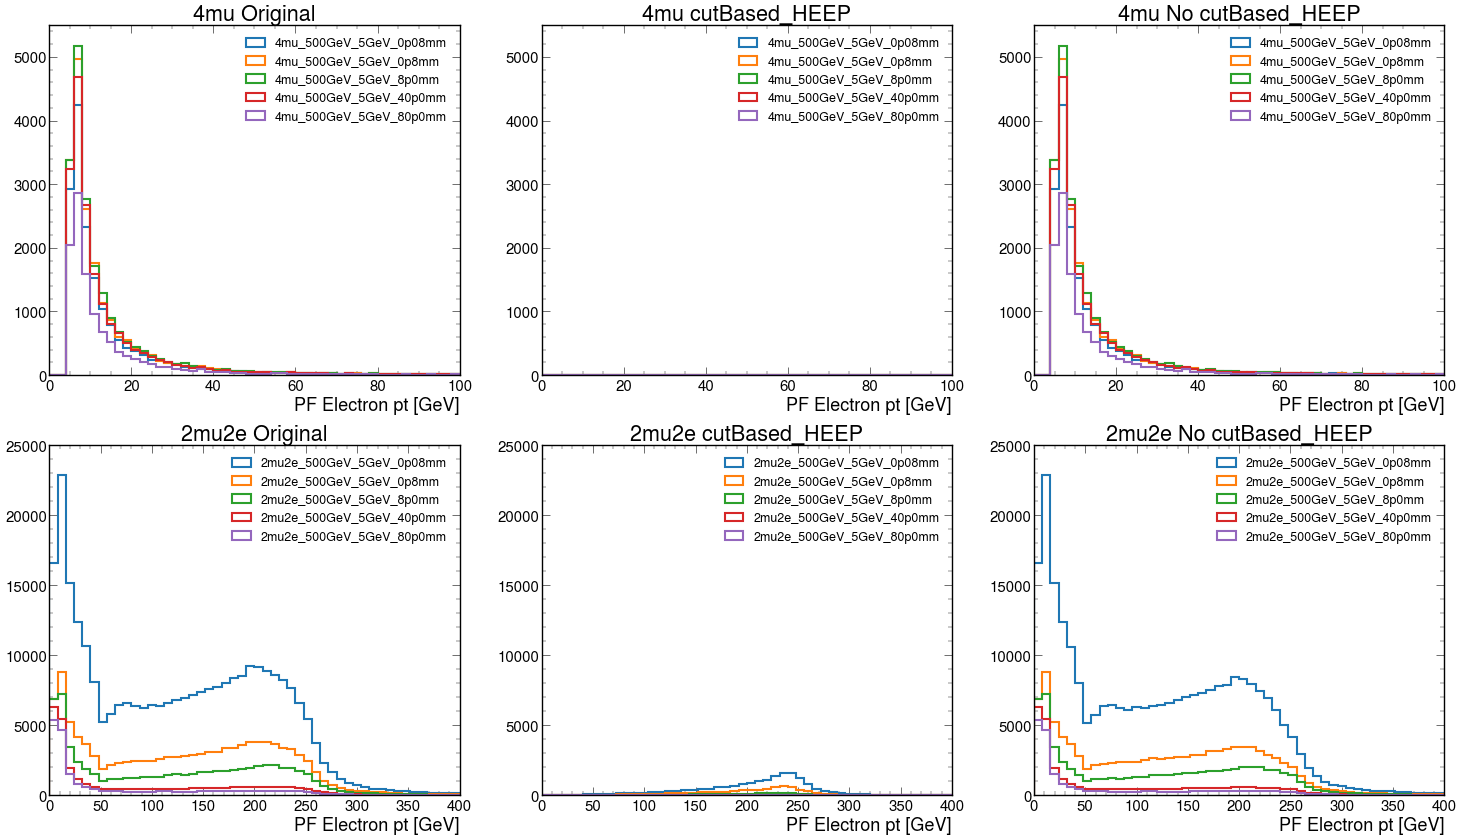

In [13]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].pt
    evt2 = events_2mu2e[i_2mu].pt    
    mask1 = (events_4mu[i_4mu].cutBased_HEEP == False)
    mask2 = (events_2mu2e[i_2mu].cutBased_HEEP == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].cutBased_HEEP]), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].cutBased_HEEP]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(0,100)
ax[0][1].set_xlim(0,100)
ax[0][2].set_xlim(0,100)
ax[1][0].set_xlim(0,400)
ax[1][1].set_xlim(0,400)
ax[1][2].set_xlim(0,400)

ax[0][0].set_ylim(0,5500)
ax[0][1].set_ylim(0,5500)
ax[0][2].set_ylim(0,5500)
ax[1][0].set_ylim(0,25000)
ax[1][1].set_ylim(0,25000)
ax[1][2].set_ylim(0,25000)

ax[0][0].set_xlabel('PF Electron pt [GeV]')
ax[0][1].set_xlabel('PF Electron pt [GeV]')
ax[0][2].set_xlabel('PF Electron pt [GeV]')
ax[1][0].set_xlabel('PF Electron pt [GeV]')
ax[1][1].set_xlabel('PF Electron pt [GeV]')
ax[1][2].set_xlabel('PF Electron pt [GeV]')

ax[0][0].legend(fontsize=18)
ax[0][1].legend(fontsize=18)
ax[0][2].legend(fontsize=18)
ax[1][0].legend(fontsize=18)
ax[1][1].legend(fontsize=18)
ax[1][2].legend(fontsize=18)


ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu cutBased_HEEP')
ax[0][2].set_title('4mu No cutBased_HEEP')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e cutBased_HEEP')
ax[1][2].set_title('2mu2e No cutBased_HEEP')

plt.savefig("../Plots/PF_ELECTRON/Boolean/cutBased_HEEP_pt.png", bbox_inches="tight")

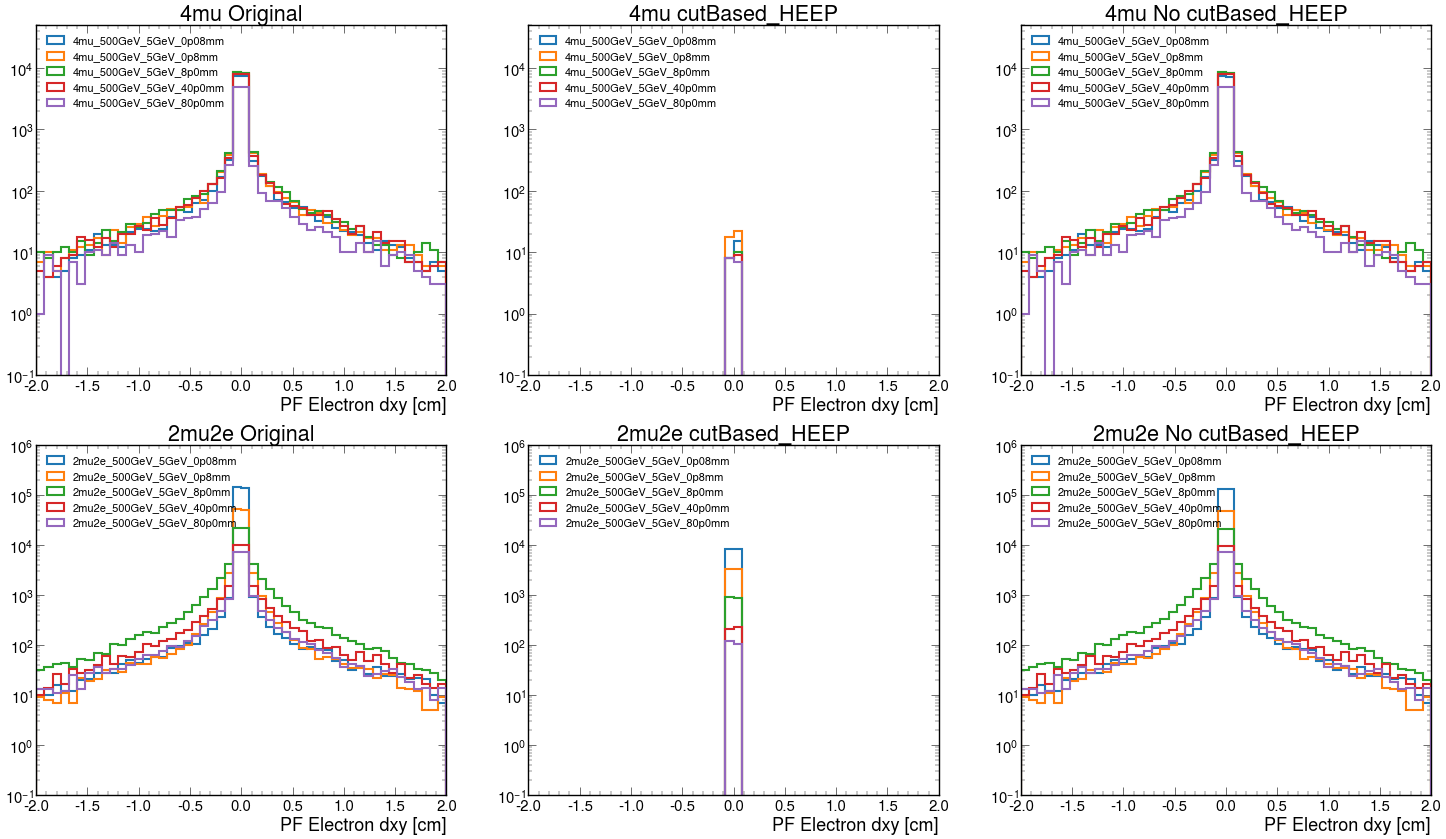

In [14]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].dxy
    evt2 = events_2mu2e[i_2mu].dxy    
    mask1 = (events_4mu[i_4mu].cutBased_HEEP == False)
    mask2 = (events_2mu2e[i_2mu].cutBased_HEEP == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].cutBased_HEEP]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].cutBased_HEEP]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(-2,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(-2,2)
ax[0][1].set_xlim(-2,2)
ax[0][2].set_xlim(-2,2)
ax[1][0].set_xlim(-2,2)
ax[1][1].set_xlim(-2,2)
ax[1][2].set_xlim(-2,2)


ax[0][0].set_ylim(0.1,50000)
ax[0][1].set_ylim(0.1,50000)
ax[0][2].set_ylim(0.1,50000)
ax[1][0].set_ylim(0.1,1000000)
ax[1][1].set_ylim(0.1,1000000)
ax[1][2].set_ylim(0.1,1000000)


ax[0][0].set_xlabel('PF Electron dxy [cm]')
ax[0][1].set_xlabel('PF Electron dxy [cm]')
ax[0][2].set_xlabel('PF Electron dxy [cm]')
ax[1][0].set_xlabel('PF Electron dxy [cm]')
ax[1][1].set_xlabel('PF Electron dxy [cm]')
ax[1][2].set_xlabel('PF Electron dxy [cm]')

ax[0][0].legend(fontsize=16, loc='upper left')
ax[0][1].legend(fontsize=16, loc='upper left')
ax[0][2].legend(fontsize=16, loc='upper left')
ax[1][0].legend(fontsize=16, loc='upper left')
ax[1][1].legend(fontsize=16, loc='upper left')
ax[1][2].legend(fontsize=16, loc='upper left')

ax[0][0].set_yscale("log")
ax[0][1].set_yscale("log")
ax[0][2].set_yscale("log")
ax[1][0].set_yscale("log")
ax[1][1].set_yscale("log")
ax[1][2].set_yscale("log")

ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu cutBased_HEEP')
ax[0][2].set_title('4mu No cutBased_HEEP')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e cutBased_HEEP')
ax[1][2].set_title('2mu2e No cutBased_HEEP')

plt.savefig("../Plots/PF_ELECTRON/Boolean/cutBased_HEEP_dxy.png", bbox_inches="tight")